In [1]:
!pip install tensorflow



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install tensorflow



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.3 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.4 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.4 MB/s eta 0:00:04
   ---------------- ------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set dataset path
data_dir = "dataset/train"  # update if your path is different

# Load dataset from directory
img_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 184 files belonging to 13 classes.
Using 148 files for training.
Found 184 files belonging to 13 classes.
Using 36 files for validation.


Classes: ['Acne', 'Burns', 'Cellulitis', 'Chickenpox', 'Contact Dermatitis', 'Diabetic Foot Ulcer', 'Eczema', 'Fungal Infection', 'Herpes Rash', 'Hives', 'Impetigo', 'Pressure Ulcers', 'Psoriasis']


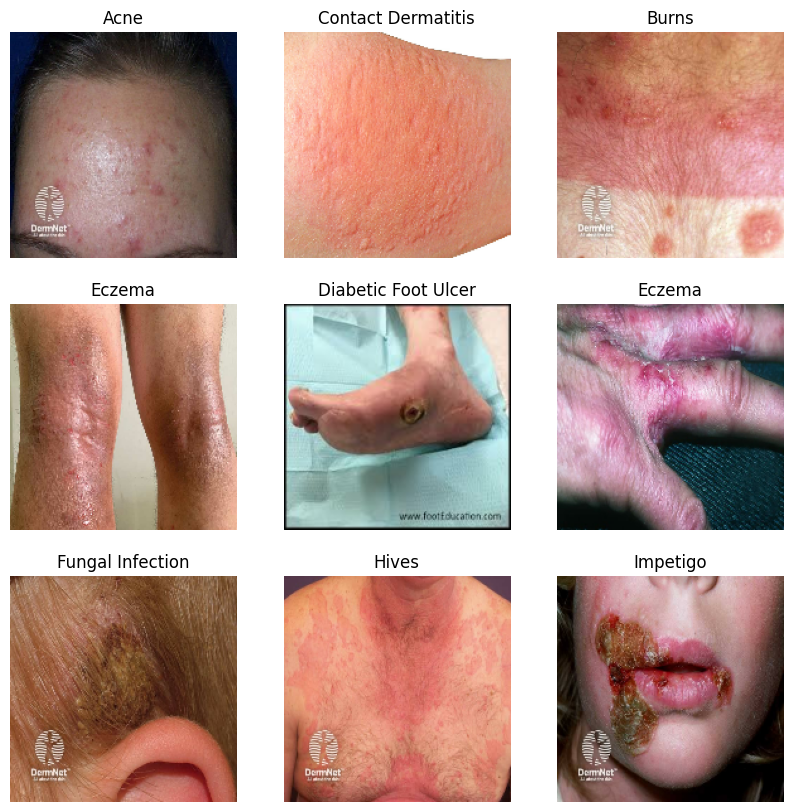

In [7]:
class_names = train_ds.class_names
print("Classes:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:
import tensorflow as tf

# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Kavinda\soccer-player-identifier-ai-main\dataset\train",
    image_size=(180, 180),
    batch_size=32
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  # output layer
])

# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Summary
model.summary()

# Train
history = model.fit(
    train_ds,
    epochs=10
)


Found 184 files belonging to 13 classes.
Classes: ['Acne', 'Burns', 'Cellulitis', 'Chickenpox', 'Contact Dermatitis', 'Diabetic Foot Ulcer', 'Eczema', 'Fungal Infection', 'Herpes Rash', 'Hives', 'Impetigo', 'Pressure Ulcers', 'Psoriasis']


C:\Users\Kavinda\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,294,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,301,293 (31.67 MB)

 Trainable params: 8,301,293 (31.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 338ms/step - accuracy: 0.0761 - loss: 6.5293
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.1196 - loss: 3.5302
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.1630 - loss: 2.5048
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.1848 - loss: 2.3370
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.3804 - loss: 2.1523
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.4674 - loss: 1.8809
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.5543 - loss: 1.6116
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.6250 - loss: 1.2897
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.7065 - loss: 1.0060
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.7772 - loss: 0.8258


In [9]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.8587 - loss: 0.5877 - val_accuracy: 0.8333 - val_loss: 0.5147
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.8913 - loss: 0.4044 - val_accuracy: 0.8611 - val_loss: 0.3879
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.9130 - loss: 0.3154 - val_accuracy: 0.8056 - val_loss: 0.5334
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.9076 - loss: 0.2855 - val_accuracy: 0.9444 - val_loss: 0.2589
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.9674 - loss: 0.1813 - val_accuracy: 0.9722 - val_loss: 0.2054
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9946 - loss: 0.1116 - val_accuracy: 1.0000 - val_loss: 0.1278
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.9946 - loss: 0.0718 - val_accuracy: 0.9722 - val_loss: 0.1265
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.9946 - loss: 0.0530 - val_accuracy: 1.0000 - val_loss:

In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
import numpy as np

# Use raw string (r"...") or double backslashes for Windows path
img_path = r"C:\Users\Kavinda\Downloads/3.jpg"

# Load and resize the image
img = load_img(img_path, target_size=(180, 180))  # resize to match training size

# Convert to array and add batch dimension
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # shape: (1, 180, 180, 3)




In [20]:
# Predict the class
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print(f"Predicted class: {predicted_class} with {confidence:.2f}% confidence")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted class: Psoriasis with 47.22% confidence


In [16]:
# Ask user if the prediction is correct
feedback = input("Is the prediction correct? (yes/no): ").strip().lower()


Is the prediction correct? (yes/no):  no


In [17]:
import os
import shutil

if feedback == "yes":
    print("✅ Great! The result is correct.")
else:
    correct_label = input("❓ What is the correct label? ").strip().lower()

    base_path = r"C:\Users\Kavinda\soccer-player-identifier-ai-main\dataset\train"
    dest_folder = os.path.join(base_path, correct_label)
    os.makedirs(dest_folder, exist_ok=True)

    filename = os.path.basename(img_path)
    new_path = os.path.join(dest_folder, filename)

    shutil.copy(img_path, new_path)

    print(f"📂 Image moved to '{correct_label}' for retraining.")


❓ What is the correct label?  Psoriasis


📂 Image moved to 'psoriasis' for retraining.


In [ ]:
import tensorflow as tf
import os

# =======================
# 1️⃣ Load Dataset
# =======================
DATA_DIR = r"C:\Users\Kavinda\soccer-player-identifier-ai-main\dataset\train"

img_size = (180, 180)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,       # 20% validation
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# =======================
# 2️⃣ Get Classes
# =======================
class_names = train_ds.class_names
num_classes = len(class_names)

print("Classes found:", class_names)
print("Number of classes:", num_classes)

# =======================
# 3️⃣ Performance Boost
# =======================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# =======================
# 4️⃣ Build Model (REBUILT)
# =======================
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)   # 🔥 Important — matches real classes
])

# =======================
# 5️⃣ Compile
# =======================
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

# =======================
# 6️⃣ Train
# =======================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

print("🔥 Training Done!")


# =======================
# 7️⃣ (Optional) Save Model
# =======================
model.save("detector_model.h5")
print("💾 Model Saved: detector_model.h5")

Found 184 files belonging to 13 classes.
Using 148 files for training.
Found 184 files belonging to 13 classes.
Using 36 files for validation.
Classes found: ['Acne', 'Burns', 'Cellulitis', 'Chickenpox', 'Contact Dermatitis', 'Diabetic Foot Ulcer', 'Eczema', 'Fungal Infection', 'Herpes Rash', 'Hives', 'Impetigo', 'Pressure Ulcers', 'Psoriasis']
Number of classes: 13


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,990,317 (15.22 MB)

 Trainable params: 3,990,317 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - accuracy: 0.0473 - loss: 2.7937 - val_accuracy: 0.1111 - val_loss: 2.5822
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.1149 - loss: 2.5419 - val_accuracy: 0.0278 - val_loss: 2.5658
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.1757 - loss: 2.4366 - val_accuracy: 0.1389 - val_loss: 2.4977
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.3514 - loss: 2.1816 - val_accuracy: 0.1389 - val_loss: 2.3942
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.4662 - loss: 1.8536 - val_accuracy: 0.1667 - val_loss: 2.2397
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.5541 - loss: 1.4544 - val_accuracy: 0.2500 - val_loss: 2.2236
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.6351 - loss: 1.2145 - val_accuracy: 0.1389 - val_loss: 2.8877
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.6959 - loss: 0.9419 - val_accuracy: 0.1111 - val_loss:

🔥 Training Done!
💾 Model Saved: soccer_player_model.h5
